IMPORTING LIBRARIES

1.I have imported numpy and pandas for running basic functions in Python

2.Seaborn, Matplotlib and Mplot3d are used for visualizing the dataset

3.Sklearn will be used for predictive analytics by performing K means clustering

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import preprocessing
%matplotlib inline

Functions imported from Python script

In [5]:
from Srivastava_Animesh_Capstone_Project_Code2 import describe_column, fill_NaN, fill_NR

IMPORTING DATASET

I have imported the dataste of Crime Incident reports of Boston from 2015-To date using the url.

The reports are provided by the Boston Police Department to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. It provides the type of offense and its description, the distrcit and its reporting area, number of shooting, occured date, year, month, week, hour of crime, street, uniform crime reporting, latitude and longitude of the location.

My main focus from this dataset is to analyze the measures to decrease the rate of the crime. To describe this I will answer the following questions -

1.Which are the top offense type?

2.Which district has the most crime rate?

3.Which year as per crime rate has most affected Boston?

4.Which month, day and hour has been most impacted by crime?

5.What is the rate of shooting in Boston?

6.Which street was most affected?

In [6]:
url = "https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpahuac81f.csv"
df = pd.read_csv(url)

df.head()

/Users/animeshsrivastava/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,NaN,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [298]:
def describe_column(name_column):
    return df[name_column].describe()

def fill_NaN(name_column):
    return df[name_column].fillna('N',inplace=True)

def fill_NR(name_column):
    return df[name_column].fillna('Not reported',inplace=True)

In [299]:
describe_column('OFFENSE_CODE_GROUP')

count                              426839
unique                                 67
top       Motor Vehicle Accident Response
freq                                49603
Name: OFFENSE_CODE_GROUP, dtype: object

In [300]:
describe_column('OFFENSE_DESCRIPTION')

count                 489572
unique                   284
top       INVESTIGATE PERSON
freq                   29977
Name: OFFENSE_DESCRIPTION, dtype: object

In [301]:
describe_column('DISTRICT')

count     487149
unique        13
top           B2
freq       77920
Name: DISTRICT, dtype: object

In [302]:
describe_column('REPORTING_AREA')

count     489572
unique       880
top             
freq       33393
Name: REPORTING_AREA, dtype: object

In [303]:
describe_column('OCCURRED_ON_DATE')

count                  489572
unique                 358661
top       2016-08-01 00:00:00
freq                       33
Name: OCCURRED_ON_DATE, dtype: object

In [304]:
describe_column('STREET')

count            471681
unique             5289
top       WASHINGTON ST
freq              24767
Name: STREET, dtype: object

In [305]:
describe_column('Lat')

count    461109.000000
mean         42.234688
std           1.941738
min          -1.000000
25%          42.296916
50%          42.325224
75%          42.348406
max          42.449840
Name: Lat, dtype: float64

In [306]:
describe_column('Long')

count    461109.000000
mean        -70.942111
std           3.141052
min         -71.244055
25%         -71.097460
50%         -71.077706
75%         -71.062563
max           0.000000
Name: Long, dtype: float64

CLEANING DATASET

After analyzing the dataset I found out that there are null values in some columns like district, shooting, ucr part, street, lattitude and longitude. There were lot of records in which the district and street were not reported so I have filled those values. These rows cannot be removed as it will alter the final result. I have also filled the missing values in shooting and ucr part. I took a subset of latitude and longitude which will be used for predictive analytics. I have also converted string date time to Python date time object.

In [307]:
print(df.isnull().sum())
print(df['DISTRICT'].unique())
print(df['SHOOTING'].unique())
print(df['UCR_PART'].unique())
print(df['STREET'].unique())

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP      62733
OFFENSE_DESCRIPTION         0
DISTRICT                 2423
REPORTING_AREA              0
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                62843
STREET                  17891
Lat                     28463
Long                    28463
Location                    0
dtype: int64
['External' 'E13' 'C11' 'D14' 'E18' 'B2' 'C6' 'A15' 'E5' 'B3' 'A1' 'A7'
 'D4' nan]
['0' nan 'Y' 0.0 1.0]
[nan 'Part One' 'Part Three' 'Part Two' 'Other']
['RIVERVIEW DR' 'DAY ST' 'GIBSON ST' ... 'N WASHINGTON ST & CAUSEWAY ST'
 'POND' 'JERSEY STREET  BOSTON  MA  USA']


In [308]:
fill_NR('DISTRICT')
fill_NaN('SHOOTING')
fill_NaN('UCR_PART')
fill_NR('STREET')
print(df.isnull().sum())
df1 = df

df1 = df1.drop(columns=['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Location'])


df1 = df1[np.isfinite(df['Lat'])]
df1 = df1[np.isfinite(df['Long'])]

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP     62733
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   0
STREET                     0
Lat                    28463
Long                   28463
Location                   0
dtype: int64


/Users/animeshsrivastava/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [309]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,N,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,N,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
2,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,N,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"
3,I92094519,3126,NaN,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,D14,765,0,2019-11-22 07:50:00,2019,11,Friday,7,N,BROOKS ST,42.355120,-71.162678,"(42.35512000, -71.16267800)"
4,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,N,WASHINGTON ST,42.309718,-71.104294,"(42.30971800, -71.10429400)"


In [310]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

DESCRIPTIVE ANALYTICS AND DATA VISUALIZATION

I have used descriptive analytcis and visualization to answer the questions that I intend to from this dataset. To decrease the crime rate in a city we need to analyze the crimes that are committed the most. From the result we can see that Motor Vehicle Accident and Larceny is committed the most. Police can put some measures to decrease these crimes which will ultimately decrease the crime rate of teh city.

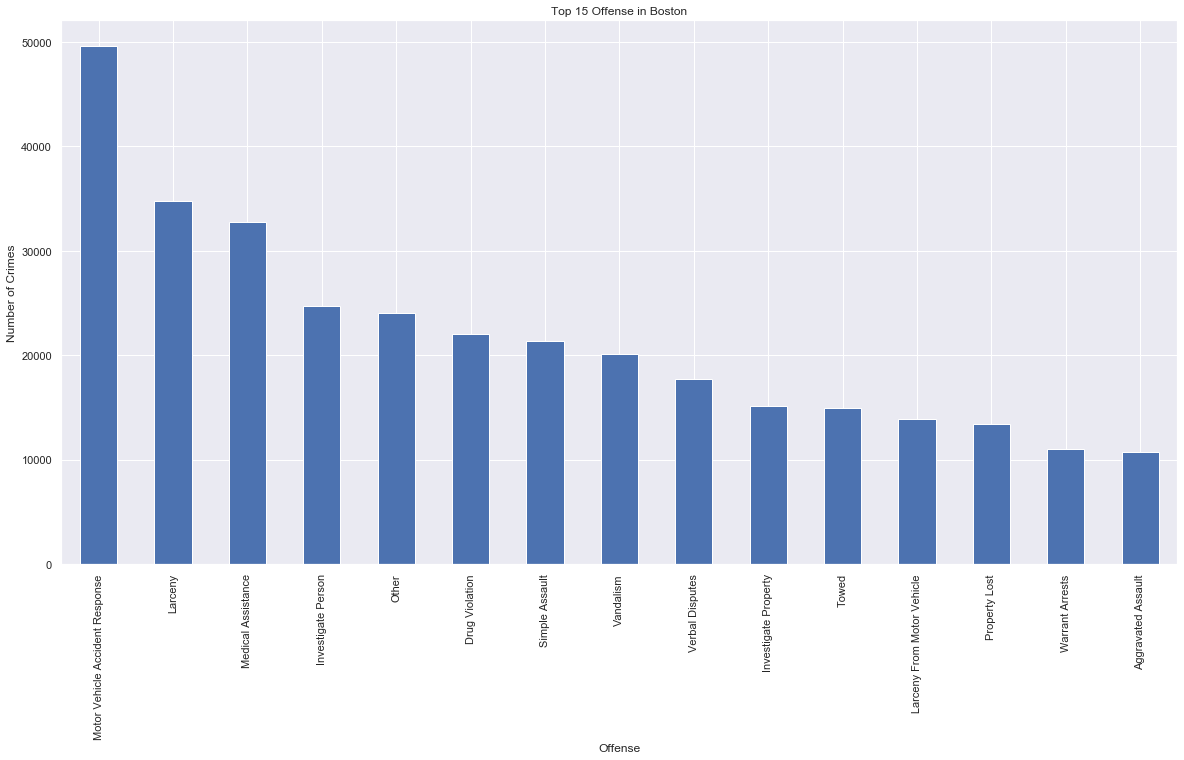

In [311]:
df.OFFENSE_DESCRIPTION.value_counts().iloc[:15]
plt.figure(figsize=(20,10))
df.OFFENSE_CODE_GROUP.value_counts().iloc[:15].plot.bar()
plt.title('Top 15 Offense in Boston')
plt.ylabel('Number of Crimes')
plt.xlabel('Offense')
plt.show()

DISTRICT WISE CRIME

B2(Roxbury), C11(Dorchester) and D4(South end) district had the most crime reported. A15(Charlestown) and A7(East Boston) has the least crime reported. A15 and A7 police district can share some measures with B2, C11 and D4 to counter the crime. 

DISTRICT
A1              53837
A15              9935
A7              19823
B2              77920
B3              55999
C11             65904
C6              35115
D14             30901
D4              62486
E13             27040
E18             27248
E5              20815
External          126
Not reported     2423
dtype: int64


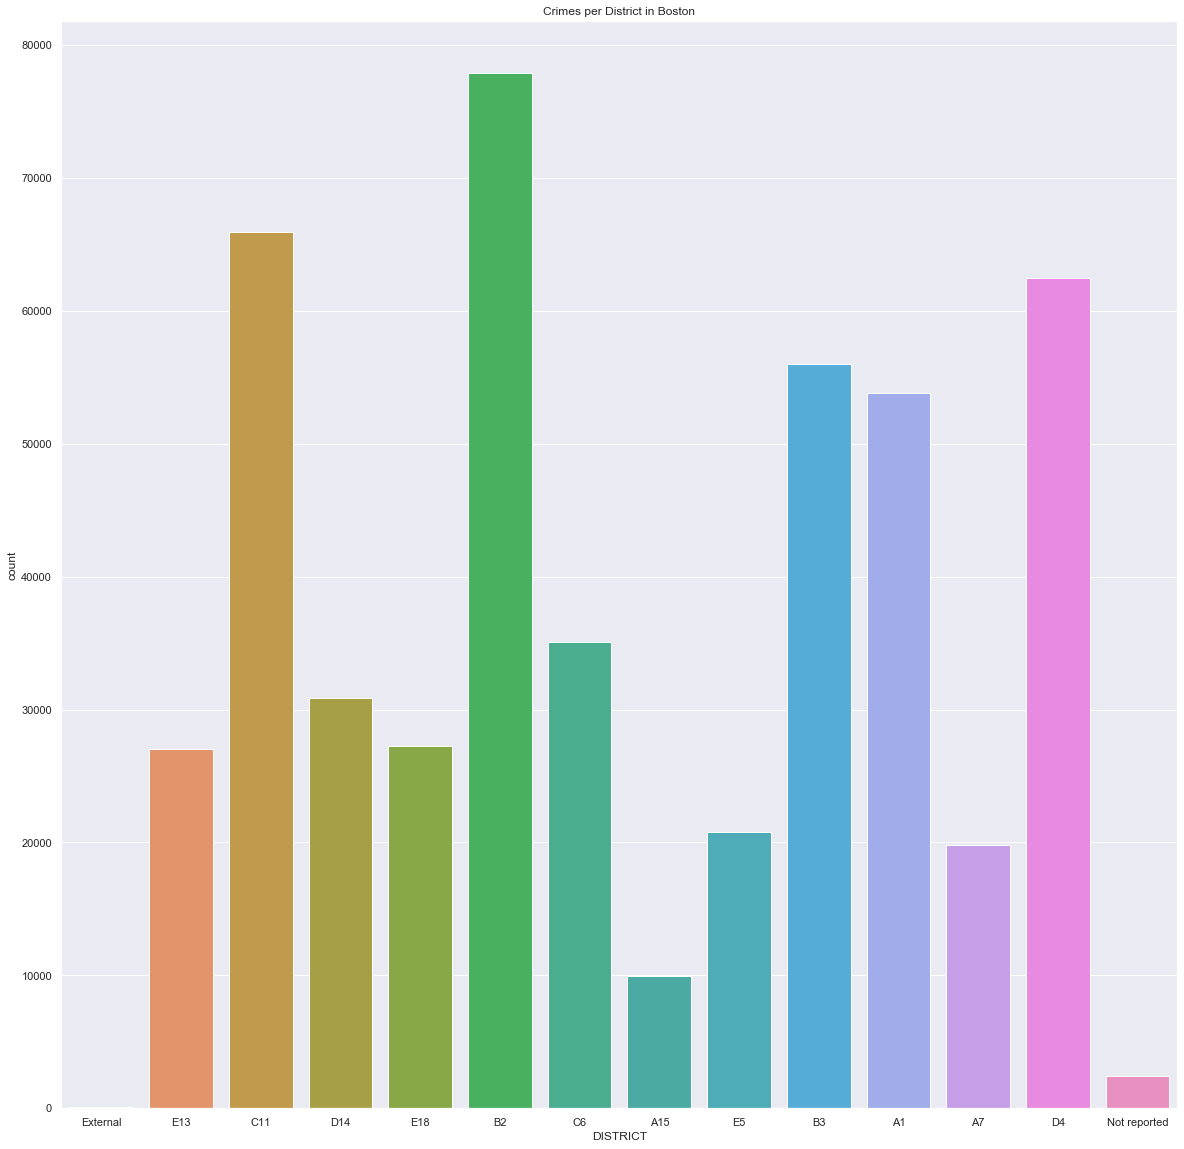

In [282]:
print(df.groupby(['DISTRICT']).size())
district = sns.countplot(df['DISTRICT'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Crimes per District in Boston')
plt.show()

YEAR WISE CRIME

2015 was the year with least crime and after that the crime has remained constant from 2016-2019. 2020 has also high number of cases as per 6 months time. This should be considered as a red alert for the city as the crime is not decreasing year wise. They should put some strict measures to deal with most occuring crimes.

YEAR
2015     53597
2016     99430
2017    101338
2018     98888
2019     98066
2020     38253
dtype: int64


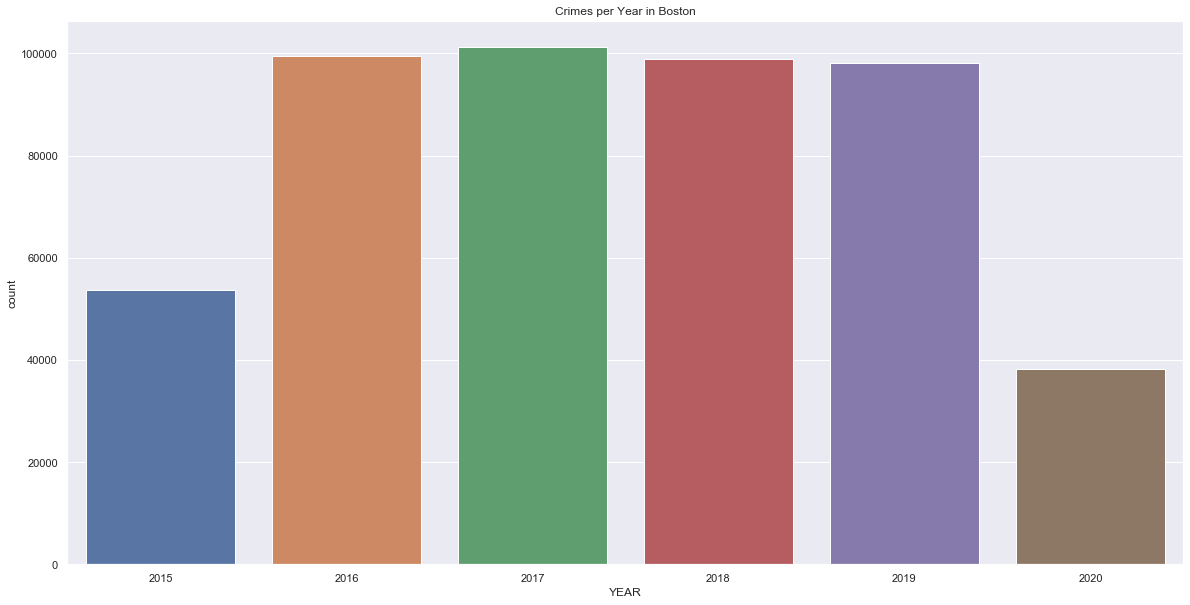

In [283]:
print(df.groupby(['YEAR']).size())
year = sns.countplot(df['YEAR'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Crimes per Year in Boston')
plt.show()

MONTH WISE CRIME

We can see that most crime happens in middle of the year i.e. June-September. Weather could be the reason for this as Boston has most of the months very cold. These times of the month are pleasant and more people are roaming outside for summer and fall. It could be the favourite time for motor theft and larceny.

MONTH
1     39435
2     36036
3     39213
4     37608
5     42012
6     42544
7     43852
8     44732
9     43084
10    42699
11    39281
12    39076
dtype: int64


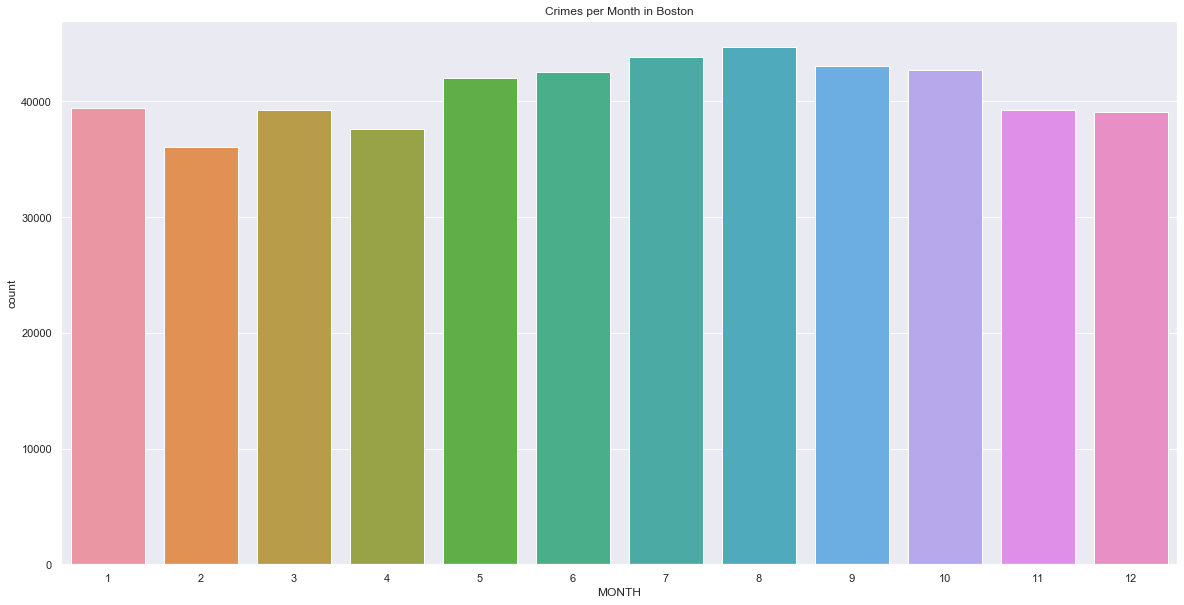

In [284]:
print(df.groupby(['MONTH']).size()) 
month = sns.countplot(df['MONTH'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Crimes per Month in Boston')
plt.show()

DAY WISE CRIME

FRIDAY and WEDNESDAY has the highest number of crime and SUNDAY being the least. We can see that the exact numbers of each day are pretty close to each other. Friday can be marked as the day with highest crime because people go out for recreation and other work more as compared to other days. Police could keep a strict watch on these days.

DAY_OF_WEEK
Friday       74717
Monday       70184
Saturday     68971
Sunday       62005
Thursday     71238
Tuesday      70712
Wednesday    71745
dtype: int64


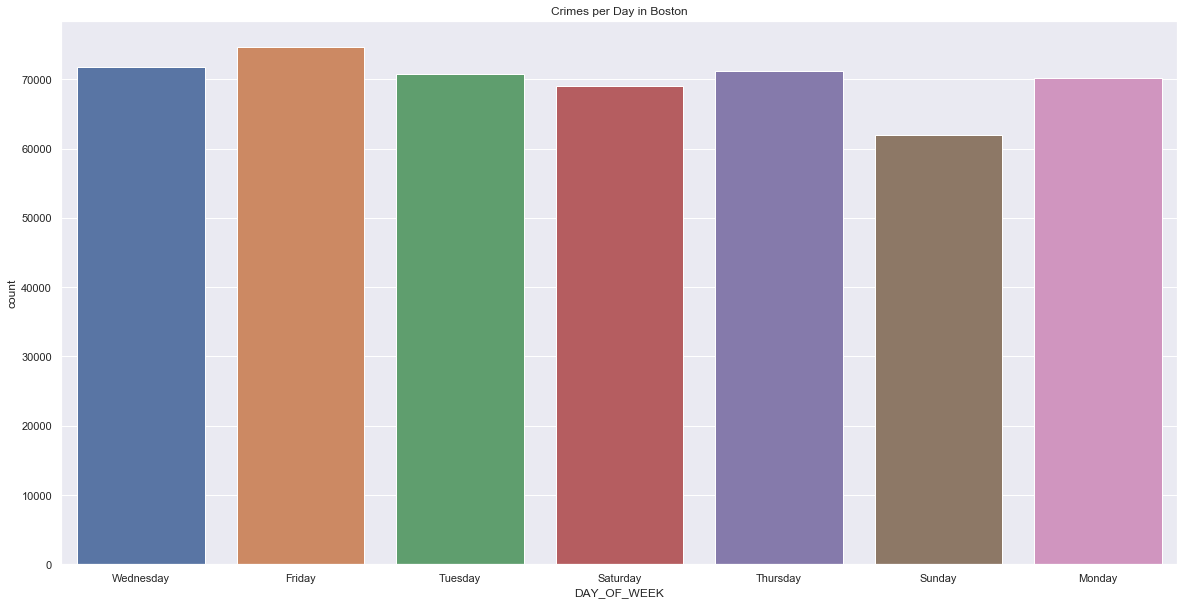

In [285]:
print(df.groupby(['DAY_OF_WEEK']).size()) 
week = sns.countplot(df['DAY_OF_WEEK'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Crimes per Day in Boston')
plt.show()

HOUR WISE CRIME

Most crimes are committed in the evening and early night time between 5pm-8pm. Least crimes are committed in the early hours of the morning. There is a average count of crime in the afternoon. Police could increase their patrol time in the night in some specific distrcits with highest number of crime. 

HOUR
0     24714
1     14012
2     11774
3      7013
4      5251
5      5168
6      7627
7     13527
8     19698
9     22462
10    24706
11    25008
12    28627
13    25785
14    26362
15    25477
16    30534
17    31635
18    30822
19    26805
20    24388
21    21926
22    19990
23    16261
dtype: int64


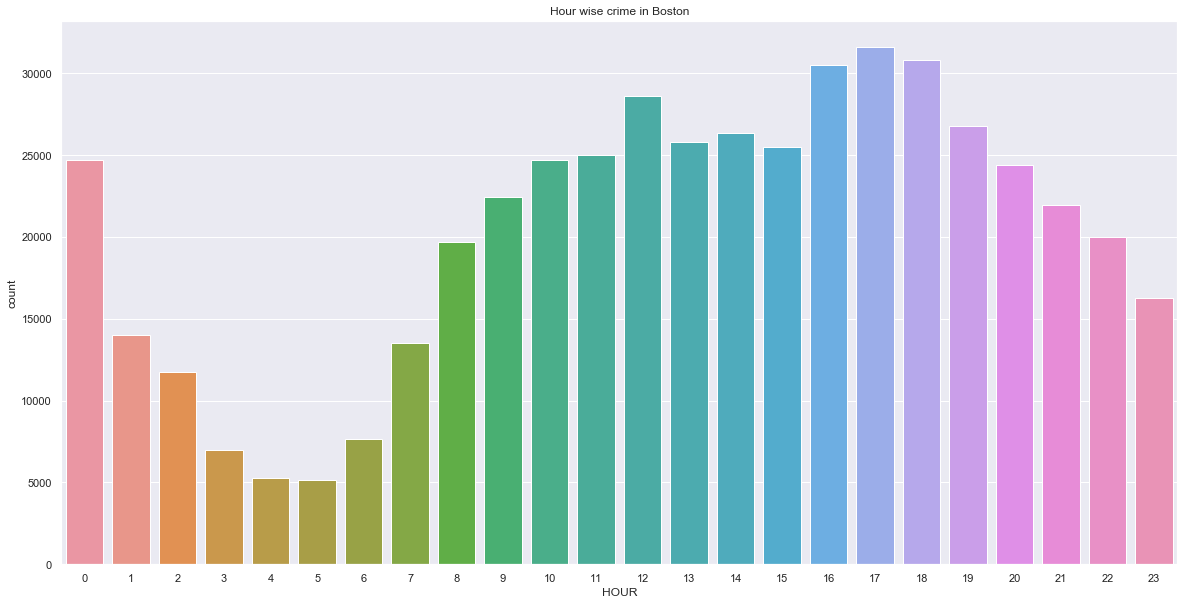

In [286]:
print(df.groupby(['HOUR']).size()) 
hour = sns.countplot(df['HOUR'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Hour wise crime in Boston')
plt.show()

SHOOTING PER YEAR 

Shooting is one of the most heinous crime as it leads to more deaths as compared to other crimes. Shooting has increased in the year of 2019 and 2020. The reason for this increase could be because of hate crime which is on the basis of race, religion, sexual orientation or other grounds. The illegal selling of guns should be governed and strict actions should be taken against the offenders.

YEAR
2015      251
2016      345
2017      457
2018      402
2019    24771
2020    38253
dtype: int64


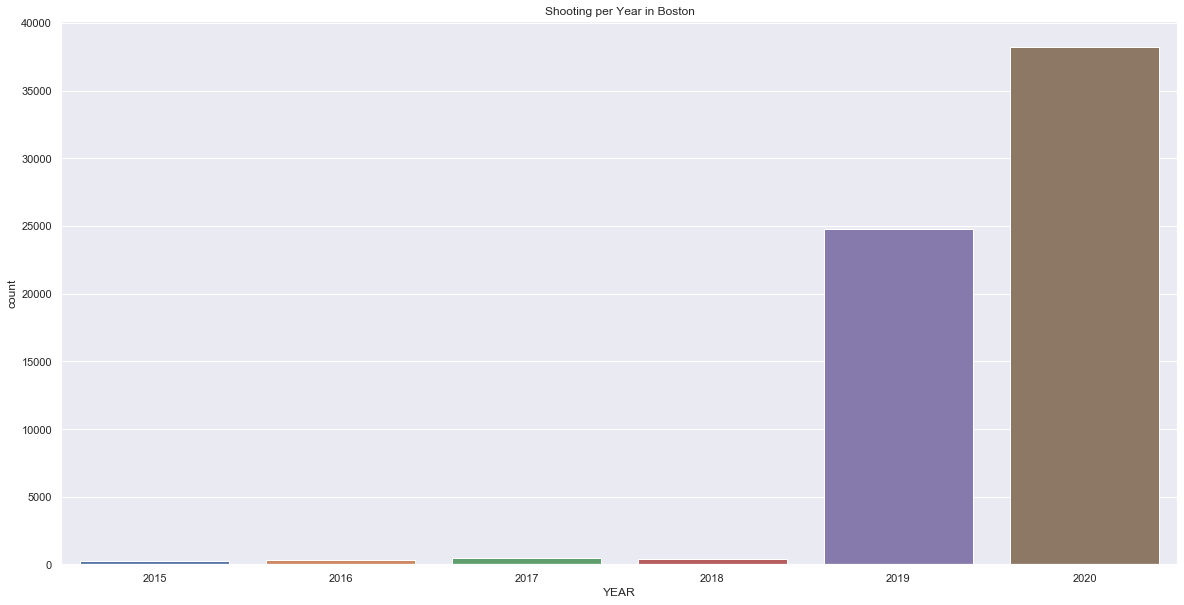

In [287]:
df_sho = df[df['SHOOTING'] != 'N']
print(df_sho.groupby(['YEAR']).size()) 
ax = sns.countplot(df_sho['YEAR'])
sns.set(rc={'figure.figsize':(20,10)})
plt.title('Shooting per Year in Boston')
plt.show()

STREET WISE CRIME

Washington Street has the most number of crimes. Suprisingly there are large number of cases in which street is not reported by the police. This definitely marks a bias in the result. But from this result police can definitely increase the surveillance on these streets.

WASHINGTON ST        24767
Not reported         17891
BLUE HILL AVE        12719
BOYLSTON ST          10157
HARRISON AVE          8536
DORCHESTER AVE        7413
TREMONT ST            7376
CENTRE ST             7359
MASSACHUSETTS AVE     6967
COMMONWEALTH AVE      6141
HYDE PARK AVE         6134
COLUMBIA RD           4761
RIVER ST              4480
HUNTINGTON AVE        4382
DUDLEY ST             3652
Name: STREET, dtype: int64


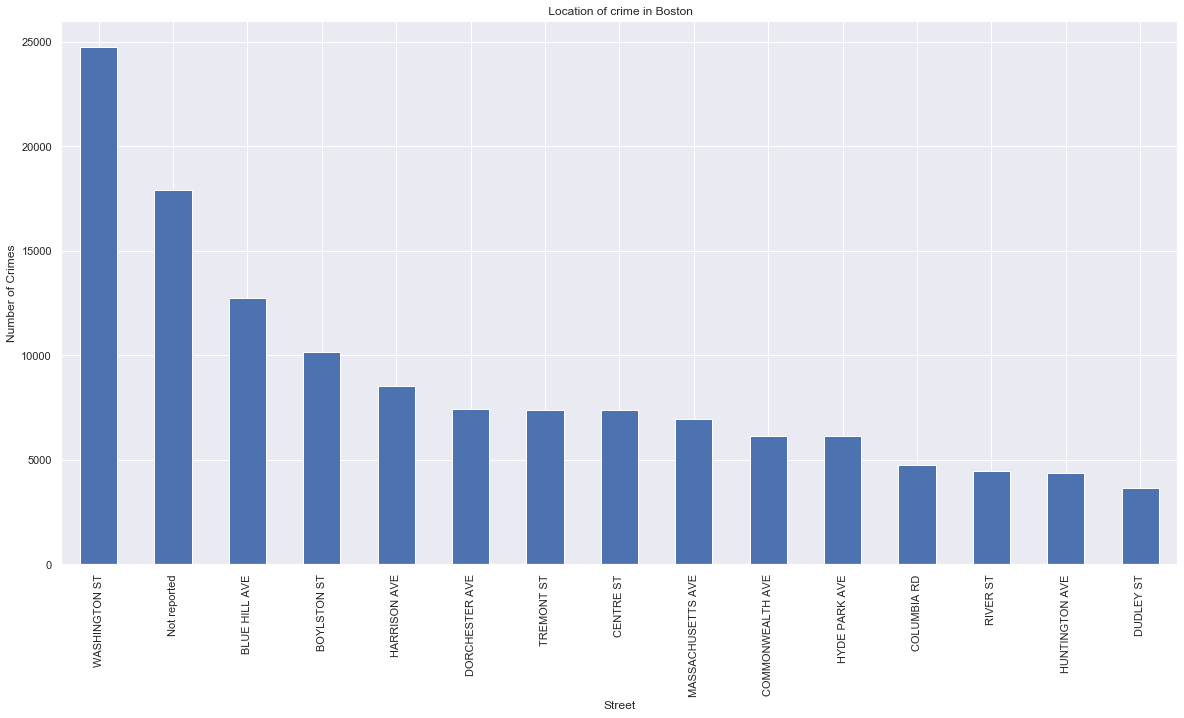

In [288]:
print(df.STREET.value_counts().iloc[:15]) 
df.STREET.value_counts().iloc[:15].plot.bar()
sns.set(rc={'figure.figsize':(20,10)})
plt.title(' Location of crime in Boston')
plt.ylabel('Number of Crimes')
plt.xlabel('Street')
plt.show()

PREDICTIVE ANALYTCIS

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.
My main motive is to find the cluster of crimes according to location of latitude and longitude. This will help to predict group of crimes in context of location. This will help the police to relate the crime and predict the location of the crime in future. I have used the subset of columns of Latitude and Longitude defined earlier as df1.

In [289]:
location = df1
location = location.loc[(location['Lat']>40) & (location['Long']<-60)]

THE ELBOW METHOD

I have used the Elbow Method to fine the optimum number of clusters to be defined. As per the graph 4, 6 and 10 numbers of clusters could divide the dataset in optimum manner according to the crime type and location.

In [290]:
map_cluster = preprocessing.scale(df1)
print(map_cluster)
map_cluster = pd.DataFrame(map_cluster)

[[ 0.04657364 -0.05274299]
 [ 0.03237655 -0.03743918]
 [ 0.0620227  -0.07022091]
 ...
 [ 0.04817633 -0.04494623]
 [ 0.04589641 -0.04681217]
 [ 0.02524118 -0.03363535]]


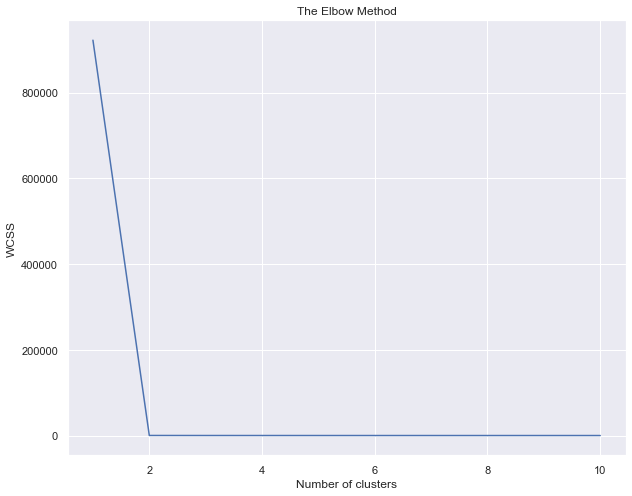

In [291]:
plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(map_cluster)
    wcss.append(kmeans.inertia_) 
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per the below graphs we can see that the clusters are divided according to the number given. It is showed in different colours as per the latitude and longitude with their centroids in blue. There are some outliers in the graph as well which could be the type of crime in that cluster which is least committed according to that latitude and longitude. This method could be used in future as well to cluster the new data added to the dataset and would help to predict the location of the crime.

In [315]:
X = location.to_numpy()
km = KMeans(n_clusters = 4)
km.fit(X)
y_kmeans = km.predict(X)

Text(0.5, 1.0, 'K Means Clustering ')

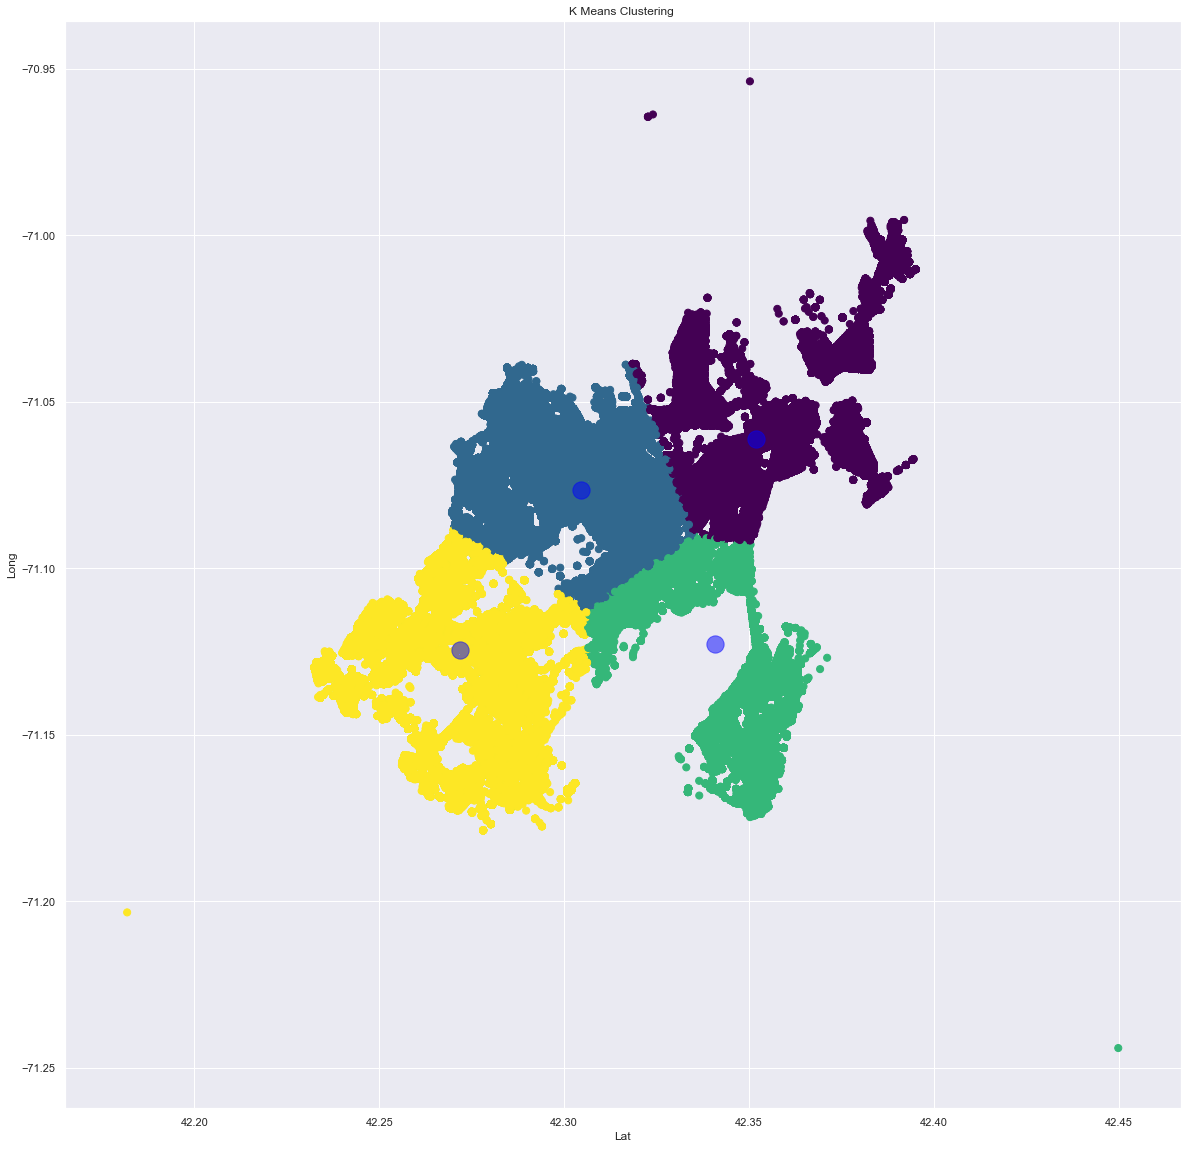

In [316]:
fig = plt.figure(figsize=(20,20))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=300, alpha=0.5);
plt.xlabel('Lat')
plt.ylabel('Long')
plt.title('K Means Clustering ')

Text(0.5, 1.0, 'K Means Clustering ')

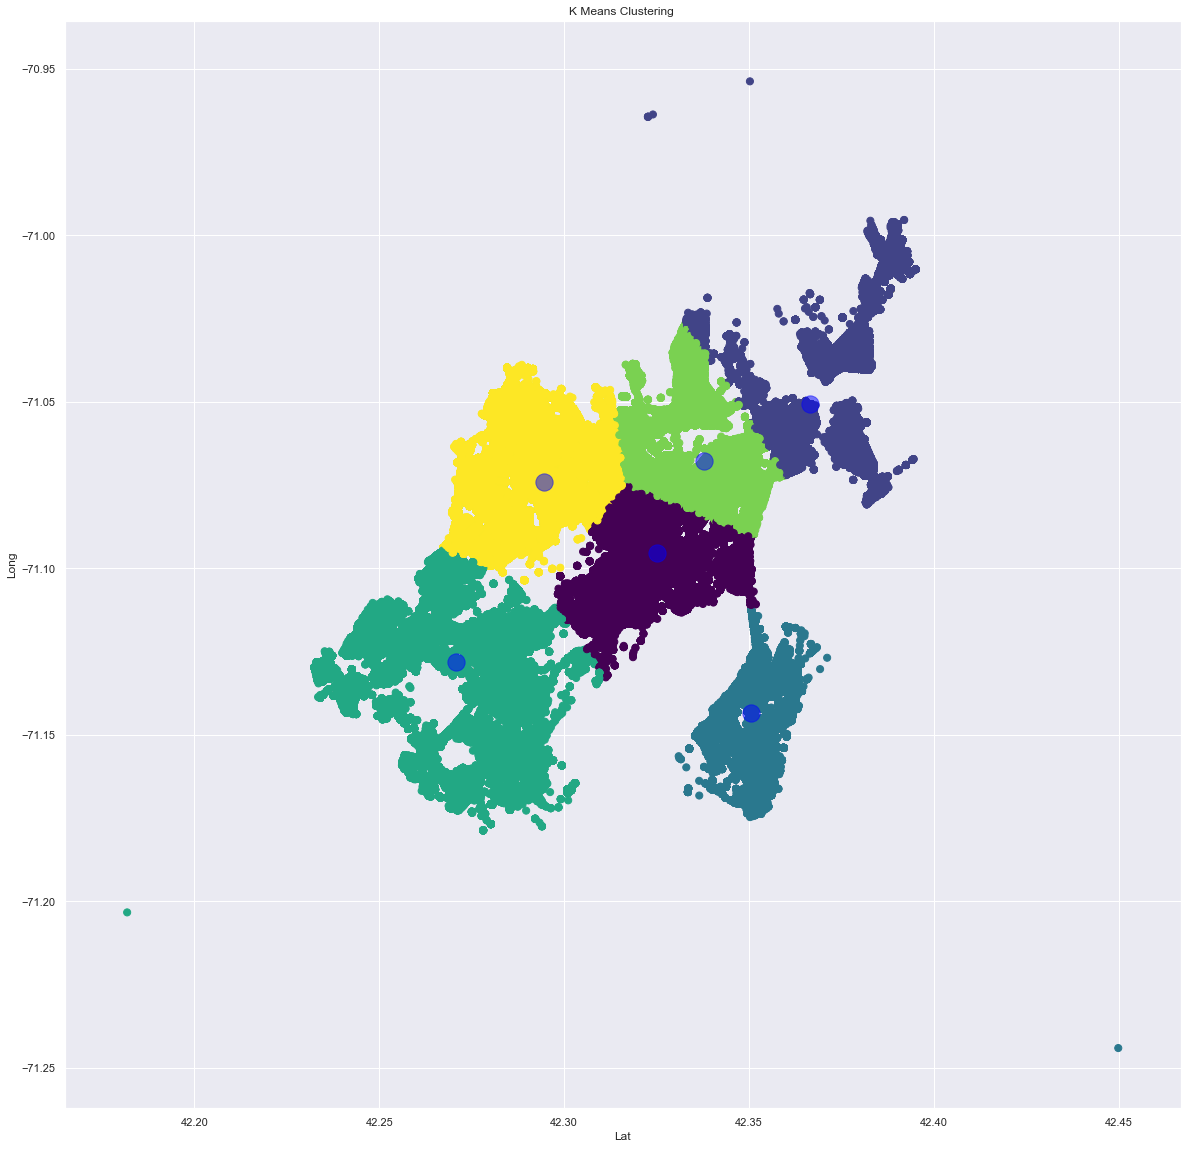

In [317]:
km = KMeans(n_clusters = 6)
km.fit(X)
y_kmeans = km.predict(X)
fig = plt.figure(figsize=(20,20))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=300, alpha=0.5);
plt.xlabel('Lat')
plt.ylabel('Long')
plt.title('K Means Clustering ')

Text(0.5, 1.0, 'K Means Clustering ')

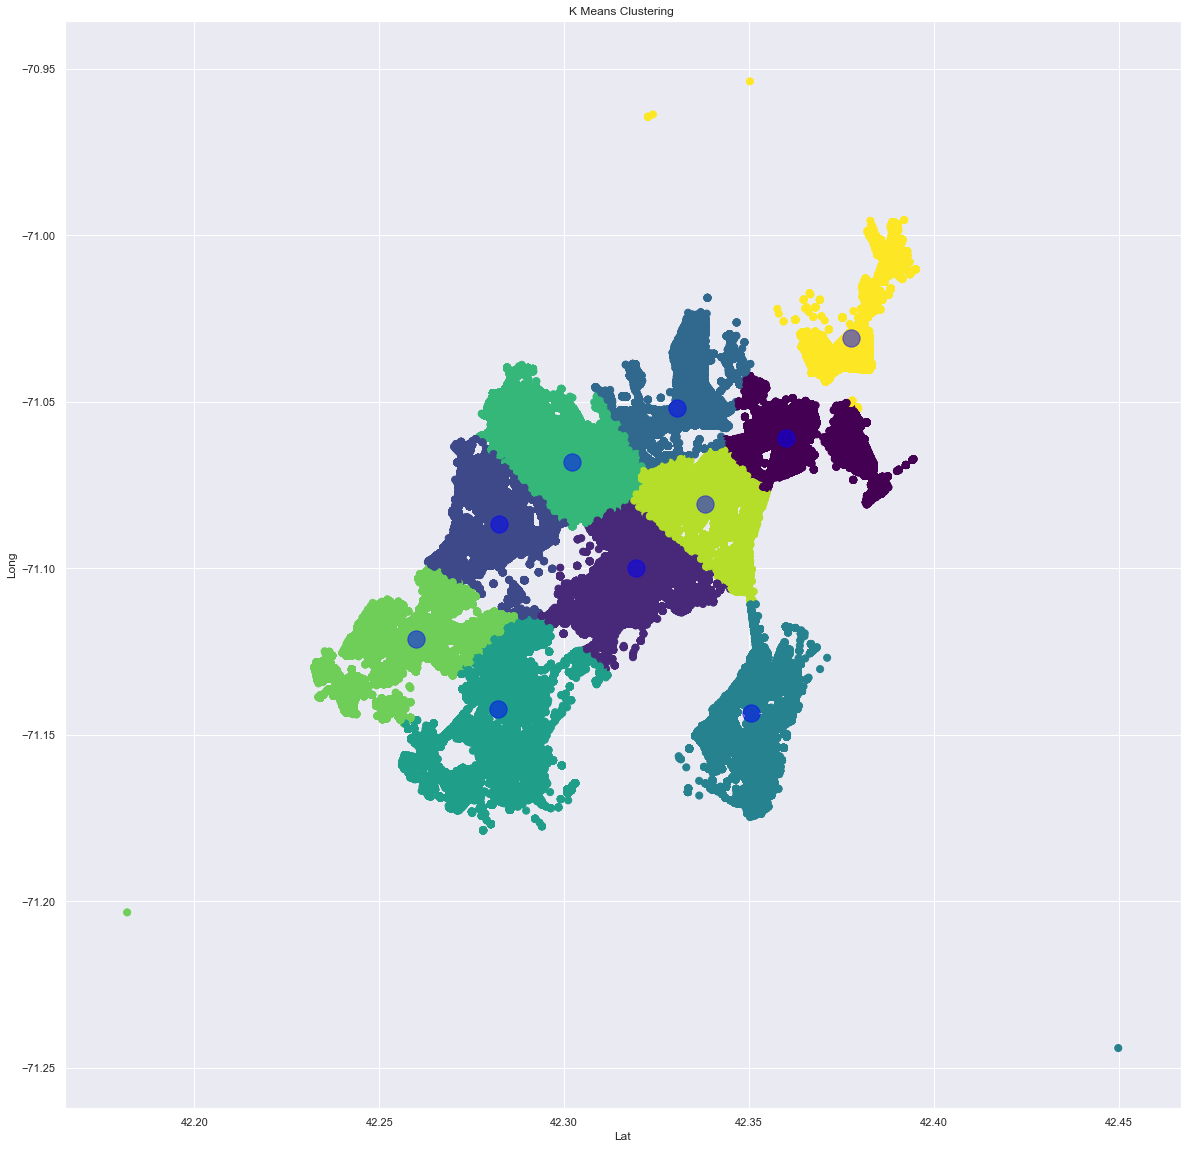

In [318]:
km = KMeans(n_clusters = 10)
km.fit(X)
y_kmeans = km.predict(X)
fig = plt.figure(figsize=(20,20))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=300, alpha=0.5);
plt.xlabel('Lat')
plt.ylabel('Long')
plt.title('K Means Clustering ')